In [1]:
import numpy as np
#import matplotlib.pyplot as plt
from bqplot import pyplot as plt
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series, pandas as pd
from ipyleaflet import (
    Map,
    Marker, MarkerCluster,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl,
    basemaps)
from bqplot import pyplot as plt, LinearScale, Axis, Figure, Bars
from IPython.display import display
import json2html
from ipywidgets import HTML, Layout
%matplotlib inline

In [2]:
# Make the graphs a bit prettier, and bigger
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60)

In [3]:
bcn_comerc = pd.read_csv('2016_cens_locals_plantabaixa.csv', parse_dates=['DATA'])
bcn_comerc.shape

/Users/ernestoarredondomartinez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(78033, 34)

In [4]:
bcn_comerc.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,SN_CARRER,SN_MERCAT,ID_MERCAT,N_MERCAT,SN_GALERIA,N_GALERIA,SN_CCOMERC,ID_CCOMERC,N_CCOMERC,N_CARRER,NUM_POLICI,REF_CAD,DATA,Codi_Barri,Nom_Barri,Codi_Districte,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517


In [5]:
bcn_comerc.N_PRINCIP.value_counts()

Actiu               60265
Sense informació    13023
Sense activitat      4745
Name: N_PRINCIP, dtype: int64

In [6]:
bcn_comerc = bcn_comerc[bcn_comerc.N_PRINCIP == "Actiu"]

In [7]:
comerc_x_districte = bcn_comerc.N_DISTRI.value_counts()
comerc_x_districte

Eixample               14368
Sant Martí              7114
Ciutat Vella            6222
Sarrià-Sant Gervasi     5771
Sants-Montjuïc          5513
Gràcia                  5451
Nou Barris              4380
Horta-Guinardó          4343
Sant Andreu             4241
Les Corts               2862
Name: N_DISTRI, dtype: int64

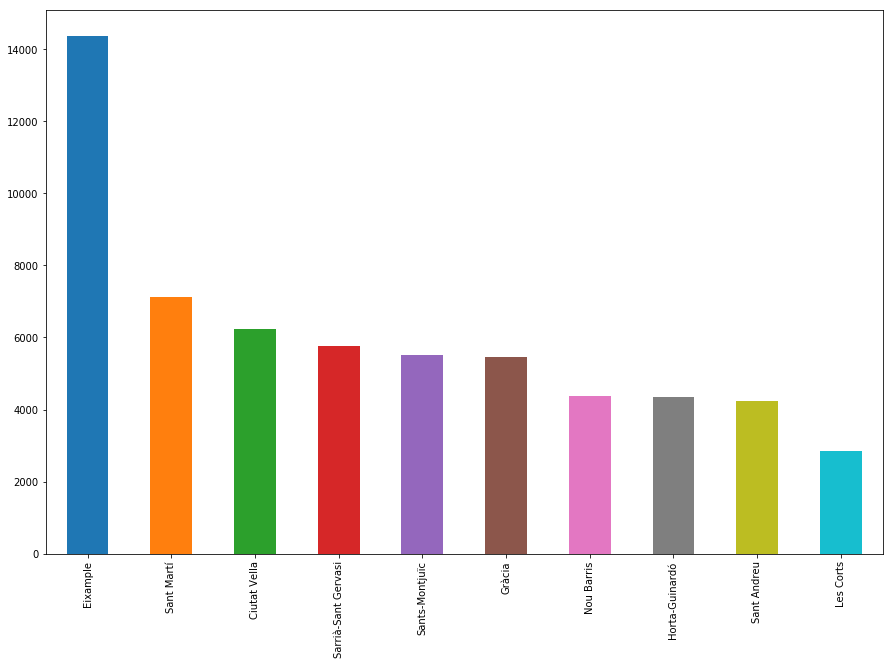

In [8]:
comerc_x_districte.plot(figsize=(15,10), kind='bar')

In [9]:
comerc_x_sectors = bcn_comerc.N_SECTOR.value_counts()
comerc_x_sectors

Serveis             31773
Comerç al detall    22747
Altres               5745
Name: N_SECTOR, dtype: int64

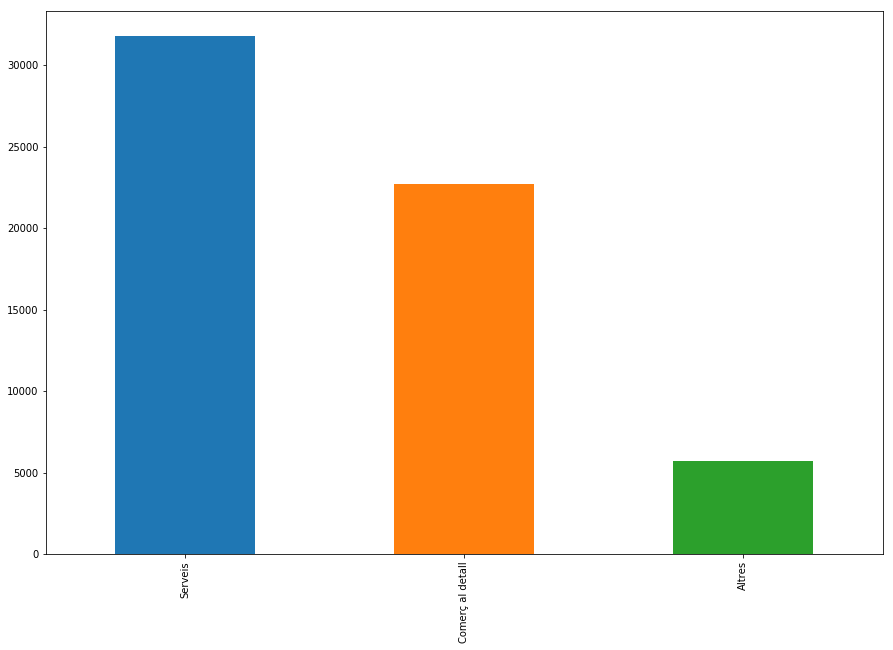

In [10]:
comerc_x_sectors.plot(figsize=(15,10), kind='bar')

In [11]:
comerc_x_activ = bcn_comerc.N_GRUPACT.value_counts()
comerc_x_activ

Altres                                                            20867
Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)    10339
Quotidià alimentari                                                8536
Equipament personal                                                5175
Quotidià no alimentari                                             2181
Parament de la llar                                                2101
Ensenyament                                                        1907
Oci i cultura                                                      1801
Sanitat i assistència                                              1698
Finances i assegurances                                            1511
Reparacions (Electrodomèstics i automòbils)                        1511
Equipaments culturals i recreatius                                 1236
Activitats immobiliàries                                            805
Manteniment, neteja i producció                                 

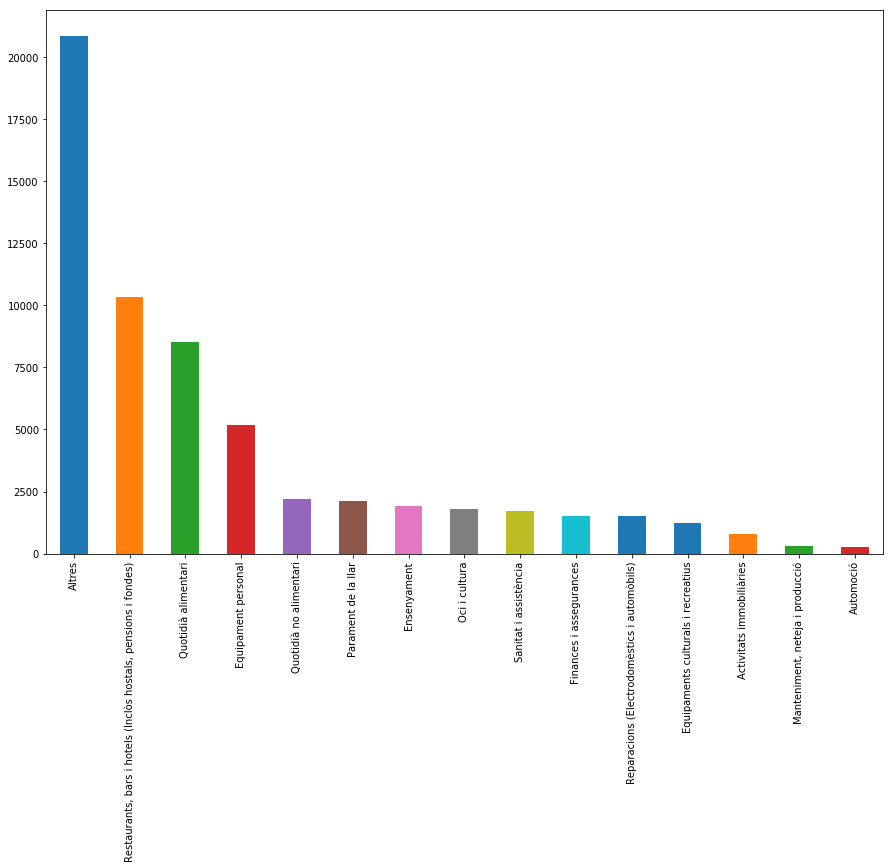

In [12]:
comerc_x_activ.plot(figsize=(15,10), kind='bar')

In [13]:
cols_csv = {bcn_comerc.columns.get_loc(c): c for c in bcn_comerc.columns}

In [14]:
pts_lon_lat = [Point(xy) for xy in zip(bcn_comerc.LONGITUD, bcn_comerc.LATITUD)]
crs = {'init': 'epsg:4326'}
gdf_bcn_comerc = GeoDataFrame(bcn_comerc[
    ['N_LOCAL', 'N_SECTOR', 'N_GRUPACT',
     'N_ACT', 'Nom_Barri', 'N_DISTRI']], crs=crs, geometry=pts_lon_lat)
gdf_bcn_comerc.head()

,N_LOCAL,N_SECTOR,N_GRUPACT,N_ACT,Nom_Barri,N_DISTRI,geometry
0,INSIDE,Comerç al detall,Equipament personal,Vestir,el Barri Gòtic,Ciutat Vella,POINT (2.182944 41.375377)
1,KURTZ & GUT,Serveis,"Restaurants, bars i hotels (Inclòs hostals, pe...",Serveis de menjar i begudes,el Barri Gòtic,Ciutat Vella,POINT (2.183092 41.37539)
2,SPRINGFIELD,Comerç al detall,Equipament personal,Vestir,el Barri Gòtic,Ciutat Vella,POINT (2.183217 41.375404)
3,CASAS KIDS,Comerç al detall,Equipament personal,Calçat i pell,el Barri Gòtic,Ciutat Vella,POINT (2.183354 41.37542)
4,BARITIMO LOUGE CLUB,Serveis,"Restaurants, bars i hotels (Inclòs hostals, pe...",Serveis de menjar i begudes,el Barri Gòtic,Ciutat Vella,POINT (2.183517 41.375425)


In [15]:
gdf_cit_vella_comerc = gdf_bcn_comerc[bcn_comerc["N_DISTRI"] == "Ciutat Vella"]
gdf_cit_vella_comerc.shape

(6222, 7)

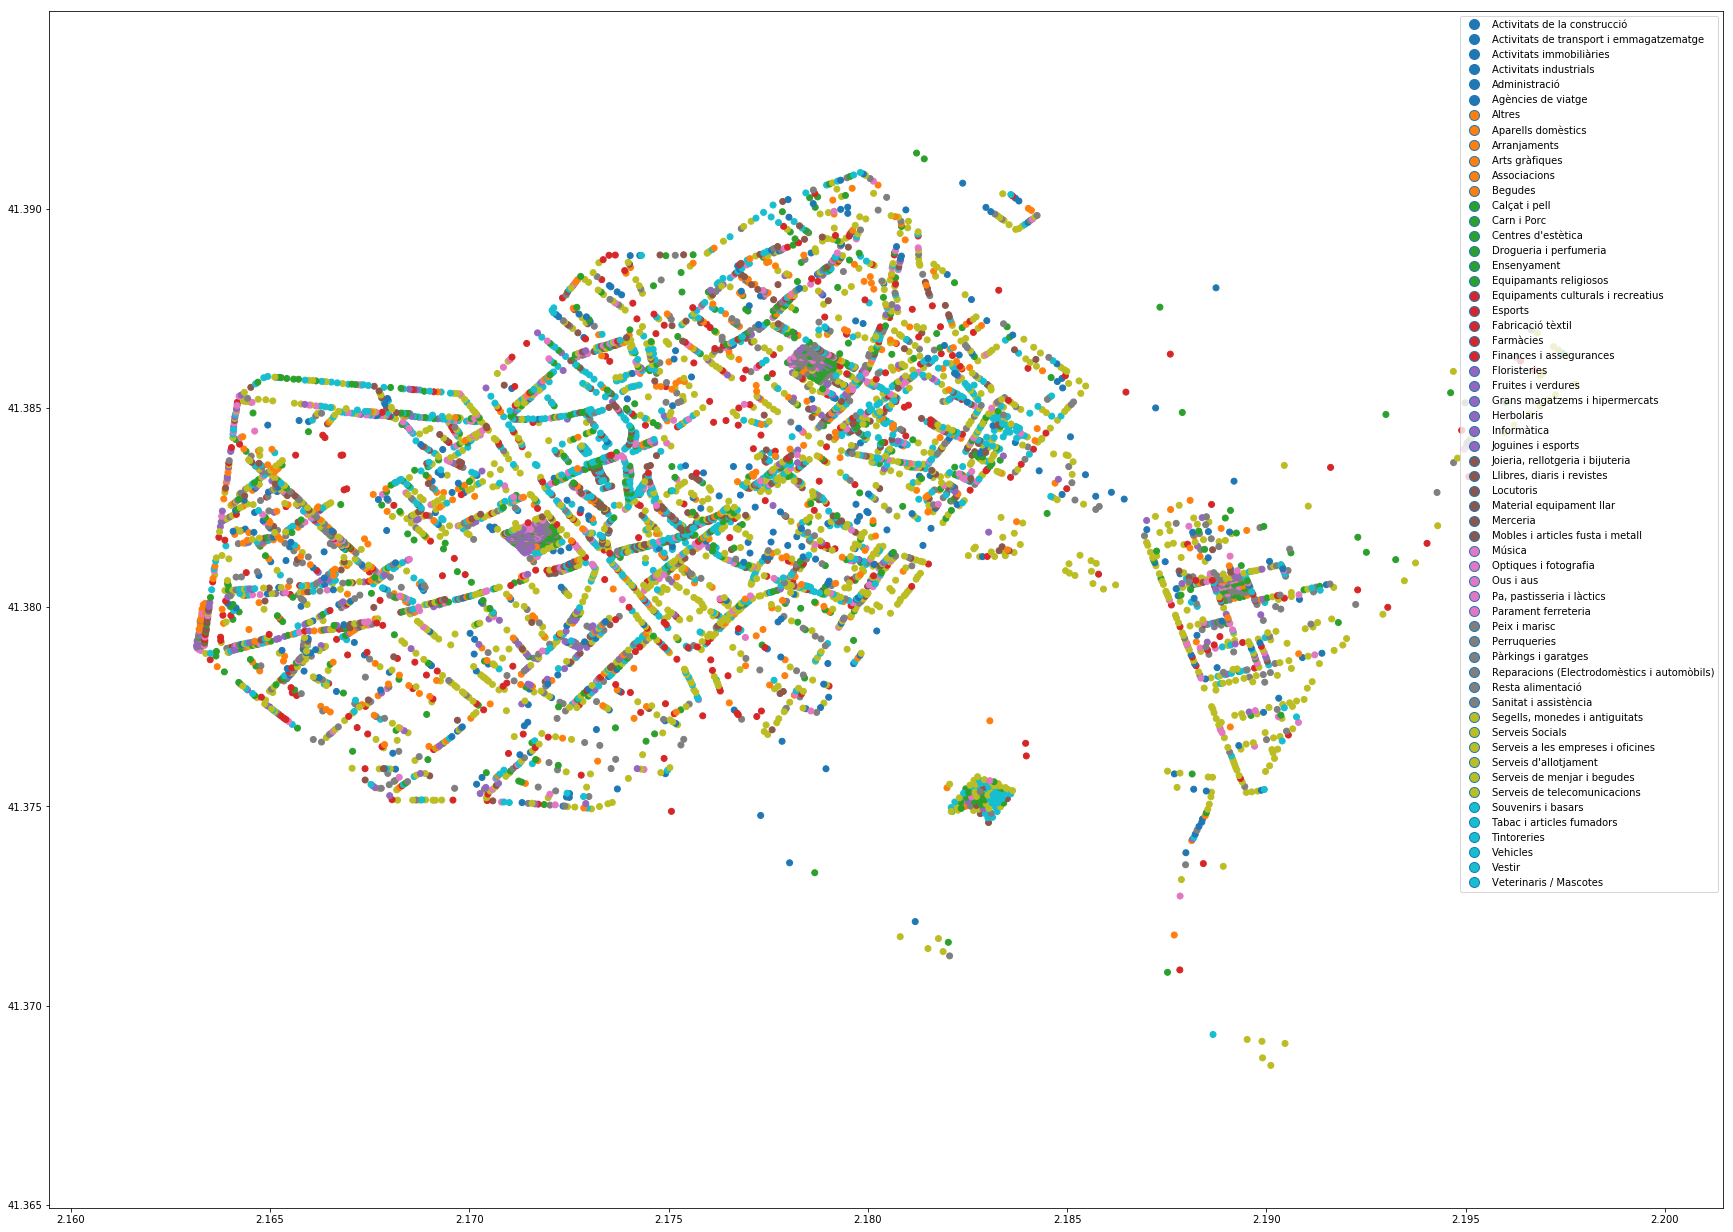

In [16]:
gdf_cit_vella_comerc.plot(column="N_ACT", legend=True, figsize=(30,25))

In [17]:
autos_cv=gdf_cit_vella_comerc[gdf_cit_vella_comerc.N_GRUPACT=="Automoció"]

In [18]:
autos_cv.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>N_LOCAL</th>\n      <th>N_SECTOR</th>\n      <th>N_GRUPACT</th>\n      <th>N_ACT</th>\n      <th>Nom_Barri</th>\n      <th>N_DISTRI</th>\n      <th>geometry</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>4865</th>\n      <td>PASAJE A LA INDIA</td>\n      <td>Comerç al detall</td>\n      <td>Automoció</td>\n      <td>Vehicles</td>\n      <td>el Raval</td>\n      <td>Ciutat Vella</td>\n      <td>POINT (2.173189 41.378133)</td>\n    </tr>\n    <tr>\n      <th>9026</th>\n      <td>MAZDA</td>\n      <td>Comerç al detall</td>\n      <td>Automoció</td>\n      <td>Vehicles</td>\n      <td>Sant Pere, Santa Caterina i la Ribera</td>\n      <td>Ciutat Vella</td>\n      <td>POINT (2.184063 41.384869)</td>\n    </tr>\n  </tbody>\n</table>'

In [19]:
gdf_cit_vella_comerc.columns

Index(['N_LOCAL', 'N_SECTOR', 'N_GRUPACT', 'N_ACT', 'Nom_Barri', 'N_DISTRI',
       'geometry'],
      dtype='object')

In [20]:
gdf1 = gdf_cit_vella_comerc[["N_LOCAL","N_ACT","geometry"]]

In [21]:
gdf1[["N_LOCAL", "geometry"]]

,N_LOCAL,geometry
0,INSIDE,POINT (2.182944 41.375377)
1,KURTZ & GUT,POINT (2.183092 41.37539)
2,SPRINGFIELD,POINT (2.183217 41.375404)
3,CASAS KIDS,POINT (2.183354 41.37542)
4,BARITIMO LOUGE CLUB,POINT (2.183517 41.375425)
5,DRUNI,POINT (2.182456 41.375443)
6,DESIGUAL,POINT (2.182607 41.375455)
7,MANGO,POINT (2.182774 41.375462)
8,TIME ROAD,POINT (2.182896 41.375478)
9,STRADIVARIUS,POINT (2.183031 41.375498)


In [22]:
def gen_marker(df):
    pt = df["geometry"]
    mk = Marker(location=(pt.y, pt.x))
    mk.popup = HTML(df[["N_LOCAL","N_ACT"]].to_frame().to_html())
    return mk
markers = gdf1.apply(gen_marker, axis=1)

In [23]:
markers.values

array([Marker(location=[41.375377, 2.182944], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>N_LOCAL</th>\n      <td>INSIDE</td>\n    </tr>\n    <tr>\n      <th>N_ACT</th>\n      <td>Vestir</td>\n    </tr>\n  </tbody>\n</table>')),
       Marker(location=[41.37539, 2.183092], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>N_LOCAL</th>\n      <td>KURTZ &amp; GUT</td>\n    </tr>\n    <tr>\n      <th>N_ACT</th>\n      <td>Serveis de menjar i begudes</td>\n    </tr>\n  </tbody>\n

In [24]:
mc = MarkerCluster(markers=markers.values.tolist())

In [25]:
center = [41.382, 2.15]
zoom = 12

In [26]:
len(mc.markers)

6222

In [27]:
m = Map(center=center, zoom=zoom,
        layout=Layout(height='600px'))
m.clear_layers()
m.add_layer(basemaps.OpenStreetMap.BlackAndWhite)
m.add_layer(mc)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [28]:
m.interact(zoom=(10,18,))

Box(children=(IntSlider(value=12, description='zoom', max=18, min=10),))

In [29]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [30]:
gdf_cit_vella_comerc.to_file("comerç_cit_vella","GeoJSON")

DriverIOError: GeoJSON driver doesn't support creating a layer on a read-only datasource